## Questions
- Is using only chi squared tests a blunder
- Degrees of freedom for chi squared (using dof = 8 renders questionable results)(could it be empty values?)
- Degress of freedom equals nan for degrees of freedom = 8
- Which chisq function do you use
- Should i regularize counts for chi squared test (make them smaller because significance goes down with sample size)
- When regularizing should i round to integers
- Removal of NA's
- Only remove row-wise for direct comparison between two movies
- How to use charts to support
- When to start capstone

# Project 1

In [1]:
import math
import scipy
import scipy.stats
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations

In [2]:
df = pd.read_csv('movieReplicationSet.csv')

In [3]:
df.head()

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1


In [4]:
demographic_columns = list(df.columns[-77:]) # column names with demographic info
movie_columns = list(df.columns[:400]) # column names containing movies

alpha = 0.005 # define alpha level to compare to later
inverse_scaling = [1,10,100,500]

In [5]:
'''UNUSED'''

def test_two_movies_for_differences(df1, df2, alpha=0.005, d_f=8):
    
    # chi sq testing
    df1_value_counts = pd.Series(df1).value_counts()
    df2_value_counts = pd.Series(df2).value_counts()

    # normalizing counts
    if(np.sum(df1_value_counts.values)>np.sum(df2_value_counts.values)):
        num_df1_ratings = np.sum(df1_value_counts.values)
        num_df2_ratings = np.sum(df2_value_counts.values)
        df1_value_counts = df1_value_counts*(num_df2_ratings/num_df1_ratings)

    else:
        num_df2_ratings = np.sum(df2_value_counts.values)
        num_df1_ratings = np.sum(df1_value_counts.values)
        df2_value_counts = df2_value_counts*(num_df1_ratings/num_df2_ratings)


    # fill in missing rating level with 0
    for rating in np.linspace(0,4,9):
        if rating not in df1_value_counts.index:
            df1_value_counts[rating] = 0
        if rating not in df2_value_counts.index:
            df2_value_counts[rating] = 0
    
    df1_value_counts = df1_value_counts.sort_index(ascending = True)
    df2_value_counts = df2_value_counts.sort_index(ascending = True)
    print(df1_value_counts)
    print(df2_value_counts)
    
    results = scipy.stats.chisquare(df1_value_counts.values, 
                          f_exp=df2_value_counts.values, 
                          axis=0)
    print(results.pvalue)
    return results.pvalue

'''UNUSED'''

'UNUSED'

In [6]:
# function used
def test_all_movies_for_differences(df1, df2, alpha=0.005, d_f=8):
    difference = 0

    # for movie in available movies 
    for movie in df1.columns:
        # reduce to selected movie
        df1_reviews = df1[movie]
        df2_reviews = df2[movie]

        
        # generate value counts of different ratings
        df1_value_counts = df1_reviews.value_counts()
        df2_value_counts = df2_reviews.value_counts()
    
        # fill in missing rating level with 0
        for rating in np.linspace(0,4,9):
            if rating not in df1_value_counts.index:
                df1_value_counts[rating] = 1
            if rating not in df2_value_counts.index:
                df2_value_counts[rating] = 1
      
        # normalizing counts
        if(np.sum(df1_value_counts.values)>np.sum(df2_value_counts.values)):
            num_df1_ratings = np.sum(df1_value_counts.values)
            num_df2_ratings = np.sum(df2_value_counts.values)
            df1_value_counts = df1_value_counts*(num_df2_ratings/num_df1_ratings)
            
        else:
            num_df2_ratings = np.sum(df2_value_counts.values)
            num_df1_ratings = np.sum(df1_value_counts.values)
            df2_value_counts = df2_value_counts*(num_df1_ratings/num_df2_ratings)
            
        df1_value_counts = df1_value_counts.sort_index(ascending = True)
        df2_value_counts = df2_value_counts.sort_index(ascending = True)
        
        print(movie)
        
        # perform chi squared test
        results = scipy.stats.chisquare(df1_value_counts.values, 
                  f_exp=df2_value_counts.values, 
                  axis=0) # p value is extremely small 
        print(results.pvalue)
        # compare resulting pvalue to our alpha threshold
        if results.pvalue>alpha:
            continue
        else:
            difference+=1

    ratio_with_difference = difference/len(df1.columns)
    print("Ratio of movies for which we reject the null hypothesis")
    return ratio_with_difference

In [7]:
def aggregate_histogram_all_movies(df1, df2):
    series1 = df1[movie_columns[0]].dropna().value_counts().sort_index(ascending=True)
    series2 = df2[movie_columns[0]].dropna().value_counts().sort_index(ascending=True)
    print(series1)
    
    for movie in movie_columns[1:]:
        for stars in df1[movie].dropna().value_counts().index:
            
            if stars not in series1.index:
                series1[stars] = 0
            series1[stars] += df1[movie].dropna().value_counts()[stars]
            
        for stars in df2[movie].dropna().value_counts().index:    
            if stars not in series2.index:
                series2[stars] = 0
            series2[stars] += df2[movie].dropna().value_counts()[stars]
    print(series1)
    series1.plot(kind='bar')
    plt.xlabel('Rating')
    plt.ylabel('Rating Count')
    plt.show()
    series2.plot(kind='bar')
    plt.xlabel('Rating')
    plt.ylabel('Rating Count')
    plt.show()
    return

### 1) Are movies that are more popular (operationalized as having more ratings) rated higher than movies that are less popular? [Hint: You can do a median-split of popularity to determine high vs. low popularity movies]

In [8]:
# select only columns with movies, find average rating and median of averages
df_movies = df[movie_columns]
aggregate_num_ratings = np.array([df_movies[movie].value_counts().sum() for movie in df_movies.columns])
median_num_ratings = np.median(aggregate_num_ratings)

In [9]:
np.mean(aggregate_num_ratings)

280.535

In [10]:
# generating names of popular and unpopular movies for selection from original df
pop_movies = [[movie,num_ratings][0] for num_ratings, movie in zip(aggregate_num_ratings,movie_columns)
               if num_ratings>=median_num_ratings]

unpop_movies = [[movie,num_ratings][0] for num_ratings, movie in zip(aggregate_num_ratings,movie_columns)
               if num_ratings<median_num_ratings]


# confirm we split down the middle
print("Popular and unpopular movie counts")
print(len(pop_movies))
print(len(unpop_movies))

unpop_movies_df = df[unpop_movies]
pop_movies_df = df[pop_movies]

unpop_counts_list = [unpop_movies_df[column].value_counts() for column in unpop_movies_df.columns] 
pop_counts_list = [pop_movies_df[column].value_counts() for column in pop_movies_df.columns]

# adding all indices to new counts to prevent nans
for value_count in unpop_counts_list:
    for rating in np.linspace(0,4,9):
        if rating not in value_count.index:
            value_count[rating]=0
            
# adding all indices to new counts to prevent nans
for value_count in pop_counts_list:
    for rating in np.linspace(0,4,9):
        if rating not in value_count.index:
            value_count[rating]=0
            
# aggregating data
unpop_movies_aggregate = pd.Series(data=np.zeros(9),index=[0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0])
pop_movies_aggregate = pd.Series(data=np.zeros(9),index=[0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0])

for movie_value_counts in unpop_counts_list:
    unpop_movies_aggregate += movie_value_counts
    
for movie_value_counts in pop_counts_list:
    pop_movies_aggregate += movie_value_counts
    
unpop_movies_aggregate = unpop_movies_aggregate*(pop_movies_aggregate.sum()/unpop_movies_aggregate.sum())

Popular and unpopular movie counts
200
200


In [11]:
unpop_movies_aggregate.sum()

90214.0

In [12]:
pop_movies_aggregate.sum()

90214.0

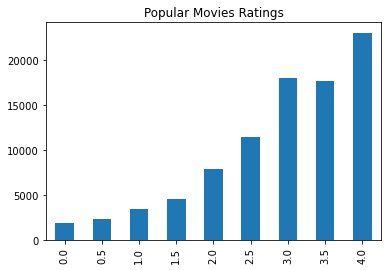

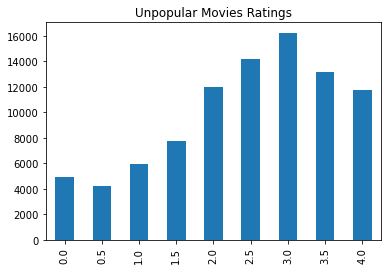

In [13]:
# hists to get a gist of what's going on here
plt.title("Popular Movies Ratings")
pop_movies_aggregate.plot(kind='bar')
plt.show()

plt.title("Unpopular Movies Ratings")
unpop_movies_aggregate.plot(kind='bar')
plt.show()

In [14]:

for scaling in inverse_scaling:
    results = scipy.stats.chisquare(pop_movies_aggregate.values/scaling, 
                          f_exp=unpop_movies_aggregate.values/scaling,  
                          axis=0) # p value is extremely small 
    print(f"s = {scaling}, p-value = {results.pvalue}")



s = 1, p-value = 0.0
s = 10, p-value = 0.0
s = 100, p-value = 4.4577659283194885e-38
s = 500, p-value = 4.5146967778132454e-06


### 2) Are movies that are newer rated differently than movies that are older? [Hint: Do a median split of year of release to contrast movies in terms of whether they are old or new]


# SOLVED

In [15]:
movie_years = [int(movie[-5:-1]) for movie in movie_columns]
median_year = np.median(movie_years)

old_movies = [movie for movie in movie_columns if int(movie[-5:-1]) < median_year]
new_movies = [movie for movie in movie_columns if int(movie[-5:-1]) >= median_year]

old_movies_df = df[old_movies]
new_movies_df = df[new_movies]

old_counts_list = [old_movies_df[column].value_counts() for column in old_movies_df.columns] 
new_counts_list = [new_movies_df[column].value_counts() for column in new_movies_df.columns]

# adding all indices to new counts to prevent nans
for value_count in new_counts_list:
    for rating in np.linspace(0,4,9):
        if rating not in value_count.index:
            value_count[rating]=0

# aggregating data
old_movies_aggregate = pd.Series(data=np.zeros(9),index=[0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0])
new_movies_aggregate = pd.Series(data=np.zeros(9),index=[0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0])

for movie_value_counts in old_counts_list:
    old_movies_aggregate += movie_value_counts
    
for movie_value_counts in new_counts_list:
    new_movies_aggregate += movie_value_counts
    
old_movies_aggregate = old_movies_aggregate*(new_movies_aggregate.sum()/old_movies_aggregate.sum())

old_movies_aggregate = old_movies_aggregate.sort_index()
new_movies_aggregate = new_movies_aggregate.sort_index()

for scaling in inverse_scaling:
    results = scipy.stats.chisquare(old_movies_aggregate.values/scaling, 
                          f_exp=new_movies_aggregate.values/scaling,
                          axis=0) # p value is extremely small 
    print(f"s = {scaling}, p-value = {results.pvalue}")

s = 1, p-value = 3.628347485931739e-15
s = 10, p-value = 0.38078547759329434
s = 100, p-value = 0.9990048292364794
s = 500, p-value = 0.9999979110335391


In [16]:
new_movies_aggregate.sum()

65690.0

In [17]:
old_movies_aggregate.sum()

65690.0

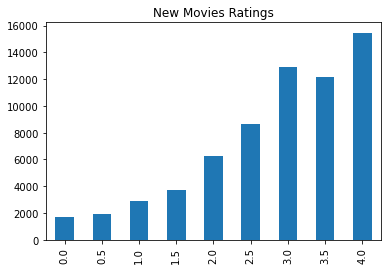

In [ ]:
# hists to get a gist of what's going on here
plt.title("New Movies Ratings")
new_movies_aggregate.plot(kind='bar')
plt.show()

plt.title("Old Movies Ratings")
old_movies_aggregate.plot(kind='bar')
plt.show()

## The normal chi squared says that they are different, but when we make the samples smaller, they are very closely related

### 3) Is enjoyment of ‘Shrek (2001)’ gendered, i.e. do male and female viewers rate it differently?


In [ ]:
print([movie for movie in df.columns if "Shrek" in movie])

In [ ]:
df_shrek = df[['Shrek (2001)','Gender identity (1 = female; 2 = male; 3 = self-described)']]

In [ ]:
value_counts_men = df_men['Shrek (2001)'].value_counts()
value_counts_women = df_women['Shrek (2001)'].value_counts()
value_counts_men[0.0] = 0

value_counts_men = value_counts_men.sort_index(ascending=True)
value_counts_women = value_counts_women.sort_index(ascending=True)

value_counts_men = value_counts_men*(np.sum(value_counts_women)/np.sum(value_counts_men))

In [ ]:
value_counts_men.plot(kind='bar')
plt.title("Male Reviews")
plt.show()

In [ ]:
value_counts_women.plot(kind='bar')
plt.title("Female Reviews")
plt.show()

In [ ]:
df_men['Shrek (2001)'].mean()

In [ ]:
df_women['Shrek (2001)'].mean()

In [ ]:
# normalize the value counts so chisq operation works
results = scipy.stats.chisquare(value_counts_men.values, 
                      f_exp=value_counts_women.values, 
                      axis=0) # p value is extremely small 

# reject the 

In [ ]:
print(results.pvalue)
print(results.pvalue<alpha)

An extremely low P-value less than our alpha threshold means that we fail to reject the null hypothesis that gender has no impact on Shrek ratings

### 4) What proportion of movies are rated differently by male and female viewers?


In [ ]:
# seperate by gender
men_df = df[df['Gender identity (1 = female; 2 = male; 3 = self-described)']==2]
women_df = df[df['Gender identity (1 = female; 2 = male; 3 = self-described)']==1]

# reduce to only movie columns
men_df = men_df[movie_columns]
women_df = women_df[movie_columns]

In [ ]:
test_all_movies_for_differences(men_df,women_df)

### 5) Do people who are only children enjoy ‘The Lion King (1994)’ more than people with siblings?

In [ ]:
only_child_df = df[df["Are you an only child? (1: Yes; 0: No; -1: Did not respond)"]==1]
siblings_df = df[df["Are you an only child? (1: Yes; 0: No; -1: Did not respond)"]==0]

only_child_df = only_child_df["The Lion King (1994)"]
siblings_df = siblings_df["The Lion King (1994)"]

only_child_values = only_child_df.value_counts()
siblings_values = siblings_df.value_counts()

for rating in np.linspace(0,4,9):
    if rating not in only_child_values.index:
        only_child_values[rating] = 0
    if rating not in siblings_values.index:
        siblings_values[rating] = 0
        
# normalizing counts
num_only_child_ratings = np.sum(only_child_values.values)
num_siblings_ratings = np.sum(siblings_values.values)
only_child_values = only_child_values*round(num_siblings_ratings/num_only_child_ratings)

results = scipy.stats.chisquare(only_child_values.values, 
          f_exp=siblings_values.values, 
          axis=0) # p value is extremely small 

In [ ]:
results.pvalue

In [ ]:
only_child_df.mean()

In [ ]:
siblings_df.mean()

### 6) What proportion of movies exhibit an “only child effect”, i.e. are rated different by viewers with siblings vs. those without?

In [ ]:
difference = 0

only_child_df = df[df["Are you an only child? (1: Yes; 0: No; -1: Did not respond)"]==1]
siblings_df = df[df["Are you an only child? (1: Yes; 0: No; -1: Did not respond)"]==0]
only_child_df = only_child_df[movie_columns]
siblings_df = siblings_df[movie_columns]

In [ ]:
test_all_movies_for_differences(only_child_df, siblings_df)

In [ ]:
aggregate_histogram_all_movies(only_child_df, siblings_df)

### 7) Do people who like to watch movies socially enjoy ‘The Wolf of Wall Street (2013)’ more than those who prefer to watch them alone?

In [ ]:
solo_df = df[df['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)']==1]
group_df = df[df['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)']==0]
solo_df = solo_df['The Wolf of Wall Street (2013)']
group_df = group_df['The Wolf of Wall Street (2013)']
solo_df.dropna(inplace=True)
group_df.dropna(inplace=True)
solo_values = solo_df.value_counts()
group_values = group_df.value_counts()

In [ ]:
for rating in np.linspace(0,4,9):
    if rating not in solo_values.index:
        solo_values[rating] = 0
    if rating not in group_values.index:
        group_values[rating] = 0
        
# normalizing counts
num_solo_ratings = np.sum(solo_values.values)
num_group_ratings = np.sum(group_values.values)
solo_values = solo_values*(num_group_ratings/num_solo_ratings)

results = scipy.stats.chisquare(only_child_values.values, 
          f_exp=siblings_values.values, 
          axis=0) # p value is extremely small 

In [ ]:
results.pvalue

In [ ]:
print(solo_df.mean())
print(group_df.mean())

### 8) What proportion of movies exhibit such a “social watching” effect?

In [ ]:
solo_df = df[df['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)']==1]
group_df = df[df['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)']==0]
solo_df = solo_df[movie_columns]
group_df = group_df[movie_columns]

In [ ]:
test_all_movies_for_differences(solo_df, group_df)

In [ ]:
aggregate_histogram_all_movies(solo_df, group_df)

### 9) Is the ratings distribution of ‘Home Alone (1990)’ different than that of ‘Finding Nemo (2003)’? 

In [ ]:
df_both = df[['Home Alone (1990)', 'Finding Nemo (2003)']]

In [ ]:
finding_nemo_values = df_both['Finding Nemo (2003)'].value_counts().sort_index(ascending=True)
home_alone_values = df_both['Home Alone (1990)'].value_counts().sort_index(ascending=True)
home_alone_values = home_alone_values*(np.sum(finding_nemo_values)/np.sum(home_alone_values))


In [ ]:
finding_nemo_values.sum()

In [ ]:
home_alone_values.sum()

In [ ]:
# normalize the value counts so chisq operation works
results = scipy.stats.chisquare(home_alone_values/10, 
                      f_exp=finding_nemo_values/10, 
                      axis=0) # p value is extremely small 


In [ ]:
results.pvalue

In [ ]:
home_alone_values.plot(kind='bar')
plt.show()
finding_nemo_values.plot(kind='bar')

### 10) There are ratings on movies from several franchises ([‘Star Wars’, ‘Harry Potter’, ‘The Matrix’, ‘Indiana Jones’, ‘Jurassic Park’, ‘Pirates of the Caribbean’, ‘Toy Story’, ‘Batman’]) in this dataset. How many of these are of inconsistent quality, as experienced by viewers? [Hint: You can use the keywords in quotation marks featured in this question to identify the movies that are part of each franchise]

In [ ]:
franchises = ['Star Wars', 'Harry Potter', 'The Matrix', 'Indiana Jones', 'Jurassic Park', 
              'Pirates of the Caribbean', 'Toy Story', 'Batman']
df_dict = {}

null_combos = []
null_pvalues = []

diff_combos = []
diff_pvalues = []

for franchise in franchises:
    df_dict[franchise] = df[[column for column in movie_columns if franchise in column]].dropna()

In [ ]:
for franchise in franchises:
    franchise_df = df_dict[franchise]
    movie_combos = list(combinations(franchise_df.columns,2))
    for combo in movie_combos:
        df1 = franchise_df[combo[0]]
        df2 = franchise_df[combo[1]]
        print(combo)
        df1_values = df1.value_counts().sort_index(ascending=True).values
        df2_values = df2.value_counts().sort_index(ascending=True).values
        # normalize the value counts so chisq operation works
        results = scipy.stats.chisquare(df1_values, 
                      f_exp=df2_values, 
                      ddof=7, 
                      axis=0) # p value is extremely small 
        print(results.pvalue)
        if results.pvalue>alpha:
            null_combos.append(combo)
            null_pvalues.append(results.pvalue)
        else:
            diff_combos.append(combo)
            diff_pvalues.append(results.pvalue)
            

In [ ]:
for franchise in franchises:
    franchise_df = df_dict[franchise]
    groups = []
    for movie in franchise_df.columns:
        groups.append(franchise_df[movie].values)
        
    results = scipy.stats.kruskal(*groups)
    print(franchise)
    print(results.pvalue)

In [ ]:
print("Fail to reject null hypothesis")
for combo, pvalue in zip(null_combos, null_pvalues):
    print(combo)
    print(pvalue)
    
    
print()
print()
print("Reject the null hypothesis")
for combo, pvalue in zip(diff_combos, diff_pvalues):
    print(combo)
    print(pvalue)

### Extra Credit: Tell us something interesting and true (supported by a significance test of some kind) about the movies in this dataset that is not already covered by the questions above [for 5% of the grade score].

I believe the additional pairwise anlaysis of movies within each franchise sufficiently completes this criteria.

## Completed
- ALL (let's go)